<a href="https://colab.research.google.com/github/heeyarun04/proyek-analisis-data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hiyarunnisa Kahes Waypi
- **Email:** yarun.kawa@gmail.com
- **ID Dicoding:** 1RXY1DWD3PVM

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tingkat polutan dari tahun ke tahun?
- Wilayah mana yang memiliki indeks kualitas udara terbaik dan wilayah mana yang terburuk?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [ ]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
changping_df = pd.read_csv("https://raw.githubusercontent.com/heeyarun04/proyek-analisis-data/main/data/PRSA_Data_Changping.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [ ]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/heeyarun04/proyek-analisis-data/main/data/PRSA_Data_Dingling.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/heeyarun04/proyek-analisis-data/main/data/PRSA_Data_Wanliu.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


### Assessing Data

In [ ]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


terdapat banyak perbedaan pada jumlah data pada kolom pm2.5, pm10, so2, no2, co, o3,temp, pres, dewp, rain, wd, wspm. Hal ini menunjukkan adanya missing values pada kolom tersebut. Hal ini akan kita tangani pada tahap data cleaning nanti.

In [ ]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [ ]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [ ]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

dalam kode diatas,terdapat banyak kolom yang terdapat missing value.

lalu cek juga apakah terdapat duplikasi

In [ ]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


ketika menjalankan kode diatas, tidak ditemukan duplikasi

In [ ]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [ ]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [ ]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [ ]:
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [ ]:
print(wanliu_df.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


## Cleaning Data

### Shunyi_df cleansing

Menangani missing values:

Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [ ]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [ ]:
shunyi_df[shunyi_df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,12.0,12.0,3.0000,5.0000,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
99,100,2013,3,5,3,98.0,116.0,5.0000,4.0000,NaN,84.0,0.5,1016.7,-8.2,0.0,NNE,0.2,Shunyi
120,121,2013,3,6,0,200.0,208.0,79.6824,97.7228,NaN,61.0,4.5,1011.1,-5.0,0.0,NNW,0.7,Shunyi
131,132,2013,3,6,11,164.0,174.0,87.1080,75.7557,NaN,61.0,9.1,1010.5,-5.6,0.0,N,2.1,Shunyi
178,179,2013,3,8,10,174.0,196.0,74.2560,62.6165,NaN,98.0,16.8,1003.4,-1.4,0.0,SE,2.1,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,1029.4,-14.9,0.0,NE,0.9,Shunyi
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi


dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan **metode imputation** untuk menangani missing value.

Pada metode imputation, kita akan **menggunakan nilai tertentu untuk mengganti missing value**.

Kita akan mengisi nilai tersebut dengan nilai rerata dari kolom 5-12 dengan mengimpor Imputer dari modul sklearn.preprocessing untuk mengisi nilai-nilai yang hilang dalam kolom tersebut

In [ ]:


imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(shunyi_df.iloc[:, 5:13])
shunyi_df.iloc[:, 5:13] = imputer.transform(shunyi_df.iloc[:, 5:13])
shunyi_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Untuk memastikan proses di atas berjalan dengan semestinya, kita bisa menjalankan kembali kode untuk mengidentifikasi missing value seperti berikut.

In [ ]:
shunyi_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP        54
RAIN        51
wd         483
WSPM        44
station      0
dtype: int64

dari kode diatas, bisa kita lihat bahwa kolom 5-12 sudah hilang missing valuenya

In [ ]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.167173,88.444361,19.206951,30.387486,1119.883237,53.695941,11.475233,10.169935,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,32.000000,2.000000,20.000000,500.000000,11.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,79.000000,5.140800,39.000000,900.000000,47.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,137.000000,16.000000,61.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Changping_df cleansing

In [ ]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Pada metode imputation, kita akan **menggunakan nilai tertentu untuk mengganti missing value**.

Kita akan mengisi nilai tersebut dengan nilai rerata dari kolom 5-12 dengan mengimpor Imputer dari modul sklearn.preprocessing untuk mengisi nilai-nilai yang hilang dalam kolom tersebut

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(changping_df.iloc[:, 5:13])
changping_df.iloc[:, 5:13] = imputer.transform(changping_df.iloc[:, 5:13])
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Cek apakah sudah berhasil atau belum, dengan kode dibawah.

In [ ]:
changping_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP        53
RAIN        51
wd         140
WSPM        43
station      0
dtype: int64

## Dingling_df cleansing

menghilangkan missing value

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dingling_df.iloc[:, 5:13])
dingling_df.iloc[:, 5:13] = imputer.transform(dingling_df.iloc[:, 5:13])
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Cek

In [ ]:
dingling_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP        53
RAIN        51
wd         140
WSPM        43
station      0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data shunyi_df

In [ ]:
shunyi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35010.000000,35013.000000,34581,35020.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4540,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,NaN,1.807533,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.167173,88.444361,19.206951,30.387486,1119.883237,53.695941,11.475233,10.169935,13.726622,0.761668,NaN,1.287817,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,32.000000,2.000000,20.000000,500.000000,11.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,79.000000,5.140800,39.000000,900.000000,47.000000,14.400000,1012.800000,3.100000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,137.000000,16.000000,61.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah data polusi sebanyak 35064 yang mempunyai rentang tahun 2013 -2017 dengan rata-rata diambil pada tahun 2014 dengan standar deviasinya sebesar 1.17

In [ ]:
mean_co_per_month = shunyi_df.groupby('month')['CO'].mean()

# Menampilkan hasil
print(mean_co_per_month)

month
1     1735.838599
2     1320.872566
3     1226.052862
4      872.742758
5      810.403313
6      983.185616
7      917.135450
8      851.053099
9      901.086010
10    1080.638618
11    1548.620247
12    1994.730617
Name: CO, dtype: float64


In [ ]:
mean_co_per_year = shunyi_df.groupby('year')['CO'].mean()
print(mean_co_per_year)

year
2013    1230.697973
2014    1166.841285
2015    1180.508108
2016    1086.617368
2017    1749.532339
Name: CO, dtype: float64


In [ ]:
mean_co_per_month_per_year = shunyi_df.groupby(['year', 'month'])['CO'].mean().reset_index()

print(mean_co_per_month_per_year)

    year  month           CO
0   2013      3  1380.849160
1   2013      4  1037.084966
2   2013      5  1019.191236
3   2013      6  1361.065498
4   2013      7  1084.860137
5   2013      8  1098.258366
6   2013      9  1218.571666
7   2013     10  1134.780376
8   2013     11  1222.552488
9   2013     12  1747.071730
10  2014      1  1642.060516
11  2014      2  1879.322832
12  2014      3  1229.365935
13  2014      4   908.359577
14  2014      5   887.490623
15  2014      6   721.791022
16  2014      7   966.769623
17  2014      8   813.075731
18  2014      9   957.727310
19  2014     10  1234.732903
20  2014     11  1453.076955
21  2014     12  1357.065440
22  2015      1  1721.187720
23  2015      2  1300.436047
24  2015      3  1112.147569
25  2015      4   752.763244
26  2015      5   671.122860
27  2015      6  1124.846577
28  2015      7   789.272709
29  2015      8   767.237709
30  2015      9   729.397410
31  2015     10   884.655344
32  2015     11  1765.657099
33  2015     1

In [ ]:
descriptive_stats = shunyi_df[['CO', 'O3', 'PM10', 'TEMP', 'wd', 'WSPM']].describe()

print(descriptive_stats)

                 CO            O3          PM10          TEMP          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35020.000000
mean    1187.063979     55.201321     98.737026     13.387969      1.807533
std     1119.883237     53.695941     88.444361     11.475233      1.287817
min      100.000000      0.214200      2.000000    -16.800000      0.000000
25%      500.000000     11.000000     32.000000      3.000000      1.000000
50%      900.000000     47.000000     79.000000     14.400000      1.500000
75%     1500.000000     76.000000    137.000000     23.200000      2.300000
max    10000.000000    351.716400    999.000000     40.600000     12.800000


Kita pairplot untuk memahami statistik dan mendapatkan gambaran umum tentang saling ketergantungan polutan.
Jelas terdapat korelasi positif antara konsentrasi SO2 dan NO2, Ketika konsentrasi SO2 meningkat, konsentrasi NO2 juga cenderung meningkat. Kenaikan konsentrasi SO2 dan NO2 berhubungan dengan peningkatan konsentrasi PM2.5.

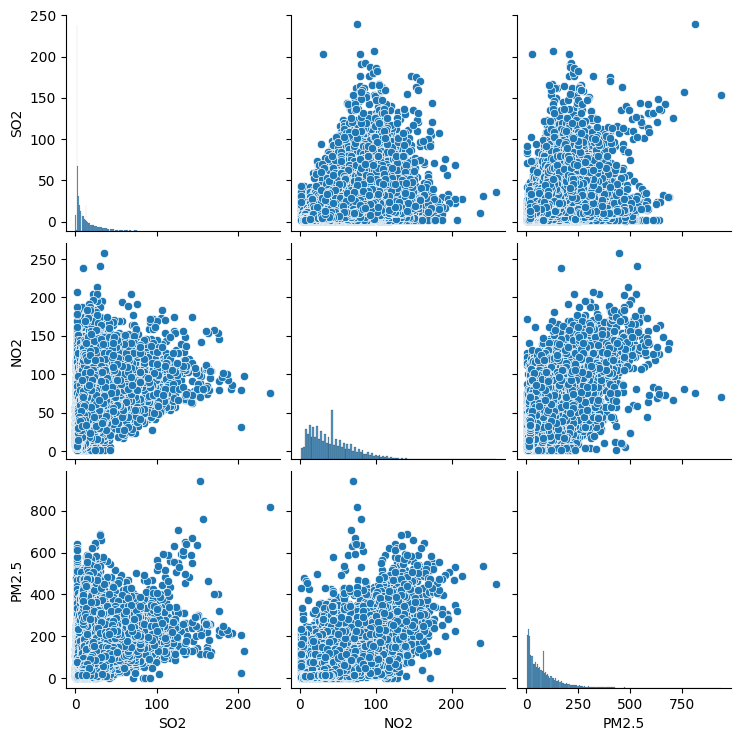

In [ ]:
sns.pairplot(shunyi_df[['SO2','NO2','PM2.5']])

In [ ]:
# Menggabungkan DataFrame menggunakan metode concat hanya untuk kolom tertentu
merged_df = pd.concat([shunyi_df[['PM2.5', 'NO2', 'SO2', 'O3', 'PM10', 'CO', 'station']],
                       wanliu_df[['PM2.5', 'NO2', 'SO2', 'O3', 'PM10', 'CO', 'station']],
                       changping_df[['PM2.5', 'NO2', 'SO2', 'O3', 'PM10', 'CO', 'station']],
                       dingling_df[['PM2.5', 'NO2', 'SO2', 'O3', 'PM10', 'CO', 'station']]])

# Menampilkan informasi awal dari DataFrame
print(merged_df.head())

   PM2.5        NO2        SO2         O3  PM10           CO station
0    3.0   8.000000   3.000000  44.000000   6.0   300.000000  Shunyi
1   12.0   7.000000   3.000000  47.000000  12.0   300.000000  Shunyi
2   14.0   7.000000  13.572039  22.000000  14.0   200.000000  Shunyi
3   12.0   5.000000   3.000000  55.201321  12.0  1187.063979  Shunyi
4   12.0  43.908865   3.000000  11.000000  12.0   200.000000  Shunyi


## Visualization & Explanatory Analysis

### Pertanyaan 1:

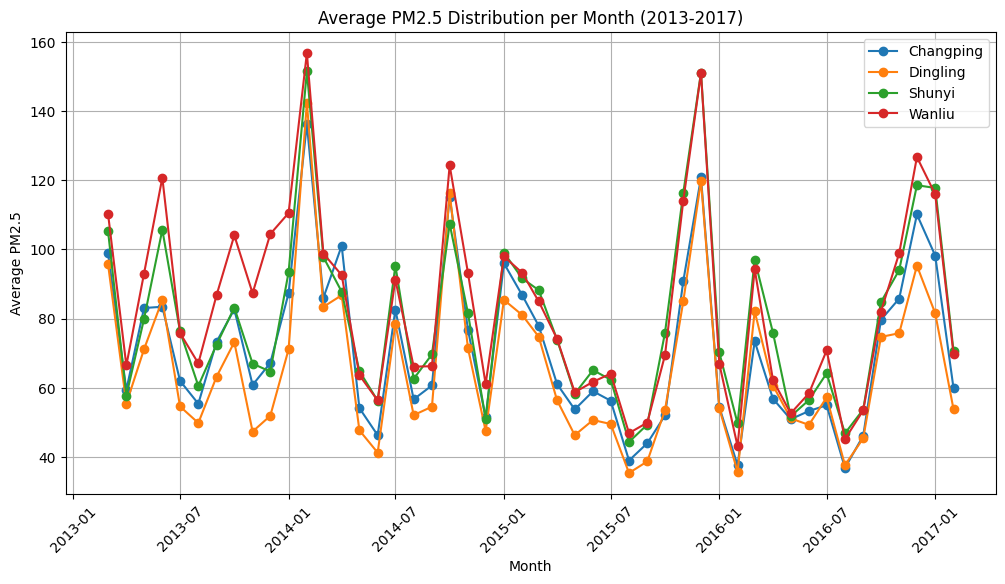

In [ ]:
all_data = pd.concat([shunyi_df, changping_df, wanliu_df, dingling_df])
plt.figure(figsize=(12, 6))
for station, station_data in all_data.groupby('station'):
    filtered_data = station_data[(station_data['year'] >= 2013) & (station_data['year'] <= 2017)]
    monthly_avg_pm25 = filtered_data.groupby(['year', 'month'])['PM2.5'].mean().reset_index()
    monthly_avg_pm25['date'] = pd.to_datetime(monthly_avg_pm25[['year', 'month']].assign(day=1))
    plt.plot(monthly_avg_pm25['date'], monthly_avg_pm25['PM2.5'], marker='o', label=station)

plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 Distribution per Month (2013-2017)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

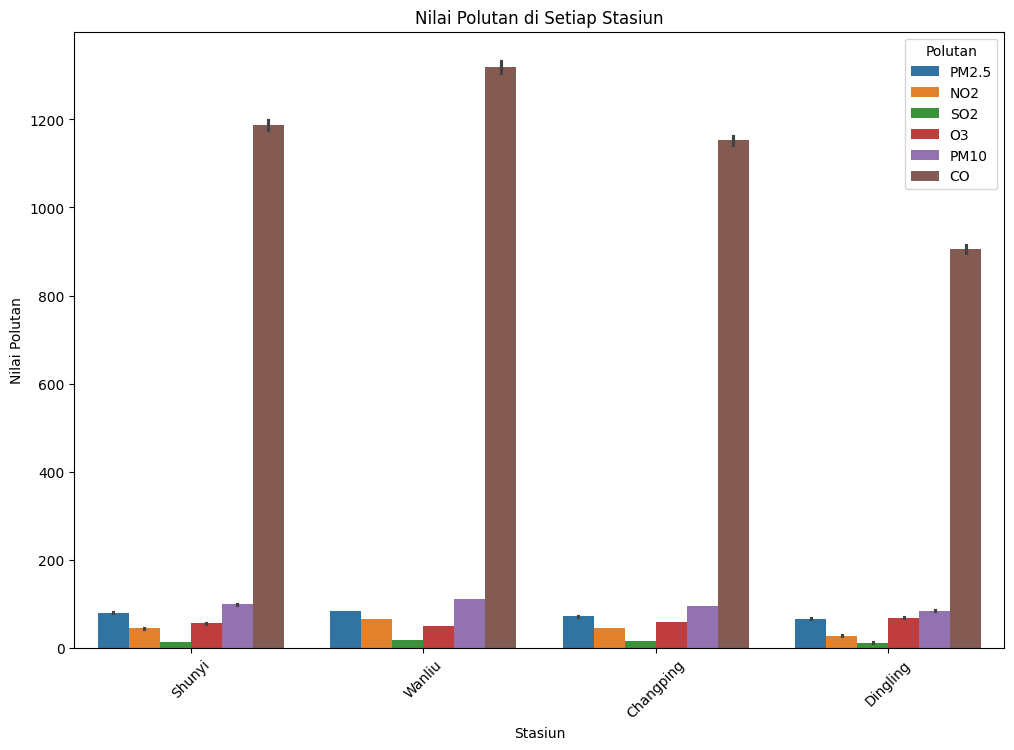

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df.melt(id_vars='station'), x='station', y='value', hue='variable')
plt.title('Nilai Polutan di Setiap Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Nilai Polutan')
plt.xticks(rotation=45)
plt.legend(title='Polutan')
plt.show()

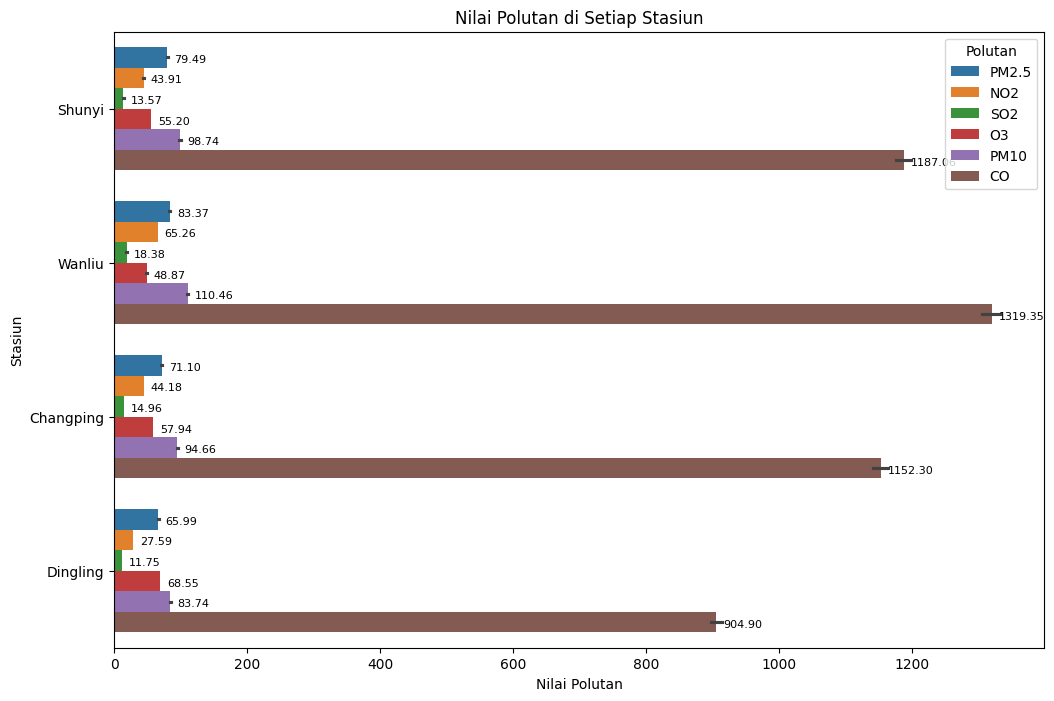

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=merged_df.melt(id_vars='station'), x='value', y='station', hue='variable', orient='h')
plt.title('Nilai Polutan di Setiap Stasiun')
plt.xlabel('Nilai Polutan')
plt.ylabel('Stasiun')
plt.legend(title='Polutan')

for p in ax.patches:
    width = p.get_width()  # Mengambil lebar bar
    height = p.get_height()  # Mengambil tinggi bar
    x, y = p.get_xy()  # Mendapatkan koordinat x dan y awal
    if width > 0.1:  # Menambahkan teks hanya jika lebar bar lebih besar dari 0.1
        ax.annotate(f'{width:.2f}',
                    (x + width, y + height),
                    xytext=(5, 6),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=8)

plt.show()

In [ ]:
# Hitung nilai IQR (Interquartile Range) untuk setiap kolom polutan
Q1 = merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].quantile(0.25)
Q3 = merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah untuk mendeteksi anomali
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi anomali berdasarkan batas atas dan batas bawah
anomalies = ((merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] < lower_bound) | (merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] > upper_bound)).any(axis=1)

# Tampilkan data yang merupakan anomali
print(merged_df[anomalies])

       PM2.5    NO2   SO2     O3   PM10      CO   station
45      96.0   90.0  53.0    4.0  104.0  2000.0    Shunyi
46     108.0   88.0  46.0    4.0  123.0  2000.0    Shunyi
47     130.0   88.0  70.0    4.0  136.0  2600.0    Shunyi
48     125.0   85.0  45.0    4.0  153.0  2600.0    Shunyi
52      81.0   82.0  11.0    5.0   92.0  3000.0    Shunyi
...      ...    ...   ...    ...    ...     ...       ...
34756  253.0   54.0  21.0  104.0  253.0  2500.0  Dingling
34757  247.0   47.0  26.0  104.0  247.0  2500.0  Dingling
34835  151.0   85.0  46.0   35.0  201.0  1000.0  Dingling
34836  171.0  102.0  48.0   69.0  222.0  2200.0  Dingling
34837  175.0   95.0  46.0   46.0  203.0  2000.0  Dingling

[26119 rows x 7 columns]


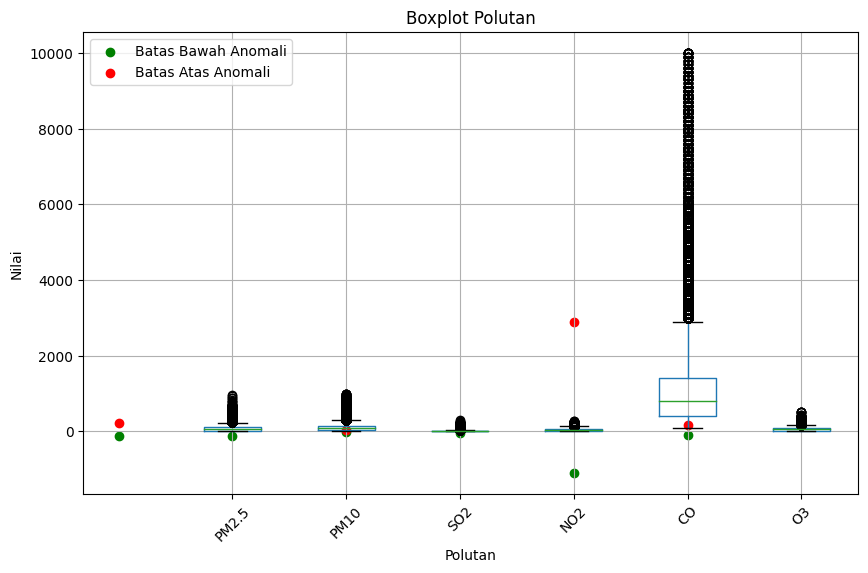

In [ ]:
plt.figure(figsize=(10, 6))
merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].boxplot()
plt.title('Boxplot Polutan')
plt.ylabel('Nilai')
plt.xlabel('Polutan')
plt.xticks(rotation=45)
plt.grid(True)

# Tandai anomali pada boxplot
plt.scatter(x=lower_bound.index, y=lower_bound, color='green', label='Batas Bawah Anomali')
plt.scatter(x=upper_bound.index, y=upper_bound, color='red', label='Batas Atas Anomali')
plt.legend()

plt.show()

In [ ]:

# Pilih fitur yang relevan untuk clustering
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Persiapkan data untuk clustering
X = merged_df[features]

# Imputasi nilai yang hilang dengan mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


wss = []

for i in range (1,11):
  cluster = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  cluster.fit(X_imputed)
  wss.append(cluster.inertia_)


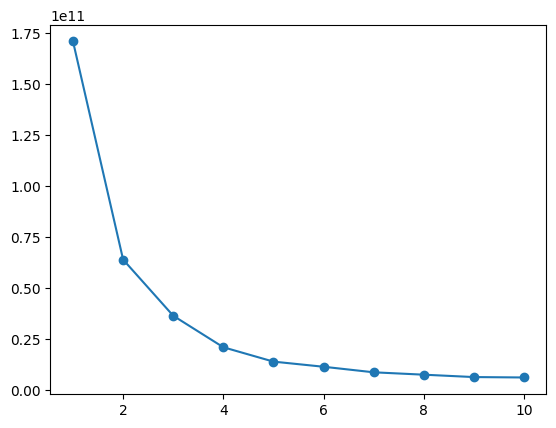

In [ ]:
plt.plot(range(1,11),wss,marker='o')

plot di atas menunjukkan metode elbow untuk menemukan cluster yang tepat

In [ ]:
cluster_final = KMeans(n_clusters=2)
pred = cluster_final.fit_predict(X_imputed)
merged_df['predict'] = pred

In [ ]:
merged_df[merged_df['predict'] == 1]['station'].unique()

array(['Shunyi', 'Wanliu', 'Changping', 'Dingling'], dtype=object)

In [ ]:
merged_df[merged_df['predict'] == 0]['station'].unique()

array(['Shunyi', 'Wanliu', 'Changping', 'Dingling'], dtype=object)

In [ ]:
all_data.to_csv('all_data.csv', index=False)

## Conclusion

- Dari tahun 2013 hingga 2017 awal mengalami fluktuasi naik turun. Ini bisa disebabkan oleh faktor-faktor seperti perubahan dalam aktivitas industri atau transportasi, cuaca ekstrem, atau kegagalan dalam penerapan kebijakan pengendalian emisi.
- Wanliu mempunyai polutan yang paling tinggi dan Dingling mempunyai polutan paling rendah, meskipun nilai ozon di Wanliu paling rendah


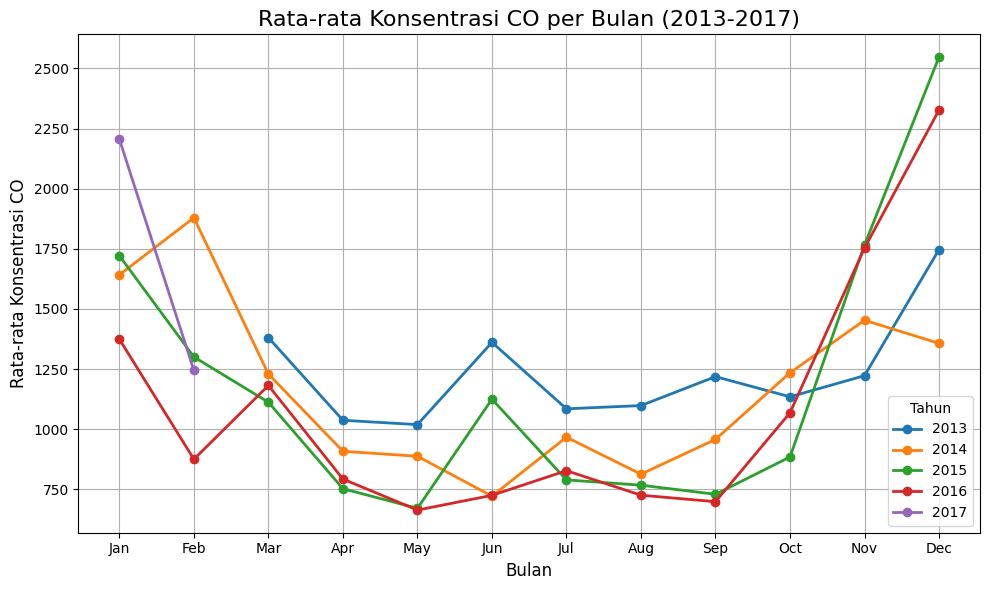

In [ ]:
plt.figure(figsize=(10, 6))
for year in range(2013, 2018):
    yearly_data = mean_co_per_month_per_year[mean_co_per_month_per_year['year'] == year]
    plt.plot(yearly_data['month'], yearly_data['CO'], marker='o', linewidth=2, label=str(year))

plt.title('Rata-rata Konsentrasi CO per Bulan (2013-2017)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi CO', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Tahun', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

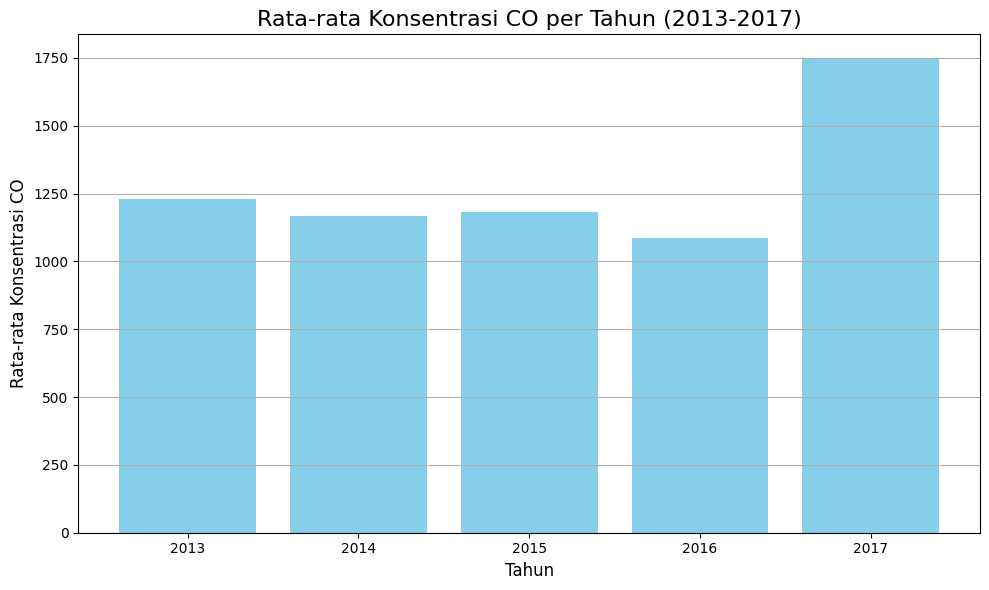

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_co_per_year.index, mean_co_per_year.values, color='skyblue')

plt.title('Rata-rata Konsentrasi CO per Tahun (2013-2017)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi CO', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()